In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('final_featured_dataset.csv')
df.shape

(188340, 26)

In [2]:
df.head()

,ID,Store_id,Date,Holiday,Discount,#Order,Sales,Sales_log,Order_log,Year,...,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,T1000001,1,2018-01-01,1,1,-1.588235,-1.520559,-3.244367,-3.522251,2018.0,...,False,False,False,False,True,False,False,False,False,False
1,T1000002,253,2018-01-01,1,1,-0.088235,0.563754,0.498665,-0.091096,2018.0,...,False,False,True,True,False,False,False,False,False,False
2,T1000003,252,2018-01-01,1,1,-0.617647,-0.130792,-0.137492,-0.754588,2018.0,...,False,True,False,True,False,False,False,False,False,False
3,T1000004,251,2018-01-01,1,1,-1.176471,-0.929239,-1.309263,-1.861084,2018.0,...,True,False,False,False,True,False,False,False,False,False
4,T1000005,250,2018-01-01,1,1,-0.029412,0.276336,0.261009,-0.029882,2018.0,...,True,False,False,False,True,False,False,False,False,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                188340 non-null  object 
 1   Store_id          188340 non-null  int64  
 2   Date              74460 non-null   object 
 3   Holiday           188340 non-null  int64  
 4   Discount          188340 non-null  int64  
 5   #Order            188340 non-null  float64
 6   Sales             188340 non-null  float64
 7   Sales_log         188340 non-null  float64
 8   Order_log         188340 non-null  float64
 9   Year              74460 non-null   float64
 10  Month             74460 non-null   float64
 11  Day               74460 non-null   float64
 12  DayOfWeek         74460 non-null   float64
 13  Is_Weekend        188340 non-null  int64  
 14  Discount_Offered  188340 non-null  int64  
 15  Sales_per_Order   188340 non-null  float64
 16  Store_Type_S2     18

importing libraries


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 3. Separate Features and Target
X = df.drop(['Sales', 'Sales_log', 'ID', 'Date'], axis=1)
y = df['Sales']

In [6]:
# 4. Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 5. Define evaluation function
def evaluate_model(model, X_val, y_val):
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, preds)
    r2 = r2_score(y_val, preds)
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}")
    print('-'*30)
    return rmse, mae, r2

In [8]:
# 6. Baseline Model - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr, X_val, y_val)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 7. Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_val, y_val)

Model: RandomForestRegressor
RMSE: 0.01
MAE: 0.00
R2 Score: 0.9998
------------------------------


(np.float64(0.01060753562323869), 0.0014106029539170297, 0.9998463946549354)

In [ ]:
# 8. Gradient Boosting Model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
evaluate_model(gbr, X_val, y_val)

Model: GradientBoostingRegressor
RMSE: 0.03
MAE: 0.02
R2 Score: 0.9991
------------------------------


(np.float64(0.025050713679270087), 0.017339885529503458, 0.9991433221526258)

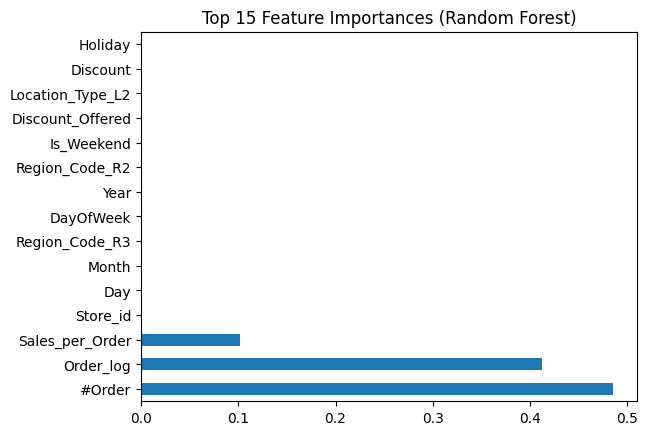

In [ ]:
# 9. Feature Importance (from Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.show()